<a href="https://colab.research.google.com/github/DavideBruni/CIDL_lab/blob/main/Lecture1/Es1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import torch

# **Es 1**
Create a simple dataset and a model, than create a LineModule and try to approximate the given dataset using a simple NN.

In [14]:
''' Class PointsDataset, the constructur expect the filePath to the txt file
   where each line is a Dataset Entry '''
class PointsDataset(torch.utils.data.Dataset):
  def __init__(self, path):
    self.data = []
    with open(path, 'r') as f:
            for line in f:
                x, y = line.split(" ")
                x, y = float(x), float(y)
                self.data.append((x, y))

  def __len__(self):
      return len(self.data)

  def __getitem__(self, idx):
      return self.data[idx]

In [15]:
# Test
ds = PointsDataset('dataset1.txt')
print(ds[0])
print(len(ds))

(-2.067504630593728, -4.3940160659490966)
100


In [21]:
''' Class LineModule, it has one parameter w. Forward method must returns y = wx '''
class LineModule(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.w = torch.nn.Parameter(torch.rand(1))

  def forward(self, x):
    return self.w * x

In [22]:
# Test
model = LineModule()
print(list(model.parameters()))
print(model(torch.tensor([2.0])))

[Parameter containing:
tensor([0.4165], requires_grad=True)]
tensor([0.8329], grad_fn=<MulBackward0>)


In [23]:
from tqdm import trange
# Training
dl = torch.utils.data.DataLoader(
    dataset = ds,
    batch_size=8
)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
loss_fn = torch.nn.MSELoss()
epochs = 1000
for epoch in trange(epochs):
    for batch in dl:
        x, y = batch
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        optimizer.zero_grad()   # set to 0 the gradients, in order to avoid unwanted results
        loss.backward()         # backpropagation using chain ruls
        optimizer.step()        # weights update

100%|██████████| 1000/1000 [00:06<00:00, 147.67it/s]


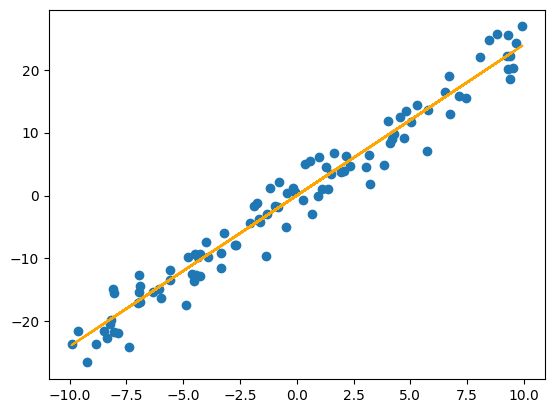

In [24]:
# Show results
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('dataset1.txt', sep=' ', names=["X", "Y"])

# detach: It destroys the association between the resulting tensor and the computation graph.
tensor_y = model(torch.tensor(df['X'])).detach().numpy()
plt.plot(df['X'],df['Y'], 'o')
plt.plot(df['X'],tensor_y, color='orange')
plt.show()